In [1]:
# import sys 
# sys.path.append("/scratch/m/murray/dtolgay")
# from tools import functions_readfiles as readfiles

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use("seaborn-poster")

In [27]:
def read_line_luminosities(fdir):
    
    lines = [
        "L_ly_alpha",  # [erg s^-1]
        "L_h_alpha", # [erg s^-1]
        "L_h_beta", # [erg s^-1]
        "L_co_10", # [K km s^-1 pc^2] 
        "L_co_21", # [K km s^-1 pc^2] 
        "L_co_32", # [K km s^-1 pc^2] 
        "L_co_43", # [K km s^-1 pc^2] 
        "L_co_54", # [K km s^-1 pc^2] 
        "L_co_65", # [K km s^-1 pc^2] 
        "L_co_76", # [K km s^-1 pc^2] 
        "L_co_87", # [K km s^-1 pc^2] 
        "L_13co",  # [K km s^-1 pc^2] 
        "L_c2", # [erg s^-1]
        "L_o3_88", # [erg s^-1]
        "L_o3_5006", # [erg s^-1]
        "L_o3_4958", # [erg s^-1] 
    ]

    gas_column_names = [
        "x",                                    # pc 
        "y",                                    # pc 
        "z",                                    # pc 
        "smoothing_length",                     # pc 
        "mass",                                 # Msolar
        "metallicity",                          # Zsolar
        "temperature",                          # Kelvin
        "vx",                                   # km/s
        "vy",                                   # km/s
        "vz",                                   # km/s
        "hden",                                 # 1/cm3
        "radius",                               # pc 
        "sfr",                                  # Msolar / year
        "turbulence",                           # km/s
        "density",                              # gr/cm3
        "mu_theoretical",                       # 1
        "average_sobolev_smoothingLength",      # pc 
        "index",                                # 1
        "isrf",                                 # G0
    ] + lines


    gas = pd.DataFrame(
        np.loadtxt(fname=fdir), 
        columns=gas_column_names
    )    
    
    return gas

def read_abundances(fdir):
    
    file_specific_columns = [
        "fh2",  # [erg s^-1]
        "fCO", # [erg s^-1]
    ]

    gas_column_names = [
        "x",                                    # pc 
        "y",                                    # pc 
        "z",                                    # pc 
        "smoothing_length",                     # pc 
        "mass",                                 # Msolar
        "metallicity",                          # Zsolar
        "temperature",                          # Kelvin
        "vx",                                   # km/s
        "vy",                                   # km/s
        "vz",                                   # km/s
        "hden",                                 # 1/cm3
        "radius",                               # pc 
        "sfr",                                  # Msolar / year
        "turbulence",                           # km/s
        "density",                              # gr/cm3
        "mu_theoretical",                       # 1
        "average_sobolev_smoothingLength",      # pc 
        "index",                                # 1
        "isrf",                                 # G0
    ] + file_specific_columns


    gas = pd.DataFrame(
        np.loadtxt(fname=fdir), 
        columns=gas_column_names
    )        
    
    gas['Mh2'] = gas['mass'] * gas['fh2']
    gas['Mco'] = gas['mass'] * gas['fCO']
    
    return gas

In [35]:
%%time

base_fdir = "/scratch/m/murray/dtolgay/cloudy_runs/z_0/m12i_res7100_md_test"

runs = {
    "expected": {
        "fdir": f"{base_fdir}/L_line_smoothingLength_expected_flux2Luminosity.txt",
        "data": pd.DataFrame(),
        "color": "black",
    },
    "nearestNDInterpolator": {
        "fdir": f"{base_fdir}/L_line_smoothingLength_nearestNDInterpolator_flux2Luminosity.txt",
        "data": pd.DataFrame(),
        "color": "red",
    },    
    "hybridInterpolator": {
        "fdir": f"{base_fdir}/L_line_smoothingLength_hybridInterpolator_flux2Luminosity.txt",
        "data": pd.DataFrame(),
        "color": "orange",
    },    
    "regularGridND": {
        "fdir": f"{base_fdir}/line_emissions_regularGridInterpolator_linear_smoothingLength.txt",
        "data": pd.DataFrame(),
        "color": "blue",
    },
    "GaussianProcessRegressor_rbf":{
        "fdir": f"{base_fdir}/line_emissions_GaussianProcessRegressor_rbf_smoothingLength.txt",
        "data": pd.DataFrame(),
        "color": "blue",        
    },
    "GaussianProcessRegressor_rational_quadratic": {
        "fdir": f"{base_fdir}/line_emissions_GaussianProcessRegressor_rational_quadratic_smoothingLength.txt",
        "data": pd.DataFrame(),
        "color": "blue",            
    },
    "RBFInterpolator":{
        "fdir": f"{base_fdir}/line_emissions_RBFInterpolator_smoothingLength.txt",
        "data": pd.DataFrame(),
        "color": "blue",           
    }
}




for run in runs.keys():
    runs[run]["data"] = read_line_luminosities(runs[run]["fdir"])

CPU times: user 1.31 s, sys: 94.5 ms, total: 1.4 s
Wall time: 2.36 s


In [29]:
# %%time

# base_fdir = "/scratch/m/murray/dtolgay/cloudy_runs/z_0/m12i_res7100_md_test"

# runs = {
#     "expected": {
#         "fdir": f"{base_fdir}/otherProperties_smoothingLength_expected.txt",
#         "data": pd.DataFrame(),
#         "color": "black",
#     },
#     "hybridInterpolator": {
#         "fdir": f"{base_fdir}/otherProperties_smoothingLength_hybridInterpolator.txt",
#         "data": pd.DataFrame(),
#         "color": "orange",
#     },    
#     "regularGridND": {
#         "fdir": f"{base_fdir}/abundance_regularGridInterpolator_linear_smoothingLength.txt",
#         "data": pd.DataFrame(),
#         "color": "blue",
#     },
#     "GaussianProcessRegressor_rbf":{
#         "fdir": f"{base_fdir}/abundance_GaussianProcessRegressor_rbf_smoothingLength.txt",
#         "data": pd.DataFrame(),
#         "color": "blue",        
#     },
#     "GaussianProcessRegressor_rational_quadratic": {
#         "fdir": f"{base_fdir}/abundance_GaussianProcessRegressor_rational_quadratic_smoothingLength.txt",
#         "data": pd.DataFrame(),
#         "color": "blue",            
#     },
#     "RBFInterpolator":{
#         "fdir": f"{base_fdir}/abundance_RBFInterpolator_smoothingLength.txt",
#         "data": pd.DataFrame(),
#         "color": "blue",           
#     }
# }




# for run in runs.keys():
#     runs[run]["data"] = read_abundances(runs[run]["fdir"])

CPU times: user 1 s, sys: 72.4 ms, total: 1.08 s
Wall time: 1.7 s


# Analysis

In [36]:
for run in runs.keys():
    print(f'log10(Lco10): {np.log10(sum(runs[run]["data"]["L_co_10"])):.5e} ---- {run}')

log10(Lco10): 6.80321e+00 ---- expected
log10(Lco10): 7.26135e+00 ---- nearestNDInterpolator
log10(Lco10): 6.86663e+00 ---- hybridInterpolator
log10(Lco10): 6.61002e+00 ---- regularGridND
log10(Lco10): 1.46407e+01 ---- GaussianProcessRegressor_rbf
log10(Lco10): 6.27879e+00 ---- GaussianProcessRegressor_rational_quadratic
log10(Lco10): 6.79774e+00 ---- RBFInterpolator


In [34]:
# for run in runs.keys():
#     print(f'log10(Mco): {np.log10(sum(runs[run]["data"]["Mco"])):.2e} ---- {run}')
    
# print("\n\n\n")
    
# for run in runs.keys():
#     print(f'log10(Mh2): {np.log10(sum(runs[run]["data"]["Mh2"])):.2e} ---- {run}')    

log10(Mco): 3.99e+00 ---- expected
log10(Mco): 1.86e+00 ---- hybridInterpolator
log10(Mco): 2.43e+00 ---- regularGridND
log10(Mco): 7.55e+00 ---- GaussianProcessRegressor_rbf
log10(Mco): 2.20e+00 ---- GaussianProcessRegressor_rational_quadratic
log10(Mco): 3.65e+00 ---- RBFInterpolator




log10(Mh2): 7.21e+00 ---- expected
log10(Mh2): 7.08e+00 ---- hybridInterpolator
log10(Mh2): 7.08e+00 ---- regularGridND
log10(Mh2): 7.55e+00 ---- GaussianProcessRegressor_rbf
log10(Mh2): 7.29e+00 ---- GaussianProcessRegressor_rational_quadratic
log10(Mh2): 7.24e+00 ---- RBFInterpolator


# Plotting against each other

/local/jupyter2021/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/local/jupyter2021/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/local/jupyter2021/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/local/jupyter2021/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/local/jupyter2021/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/local/jupyter2021/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero 

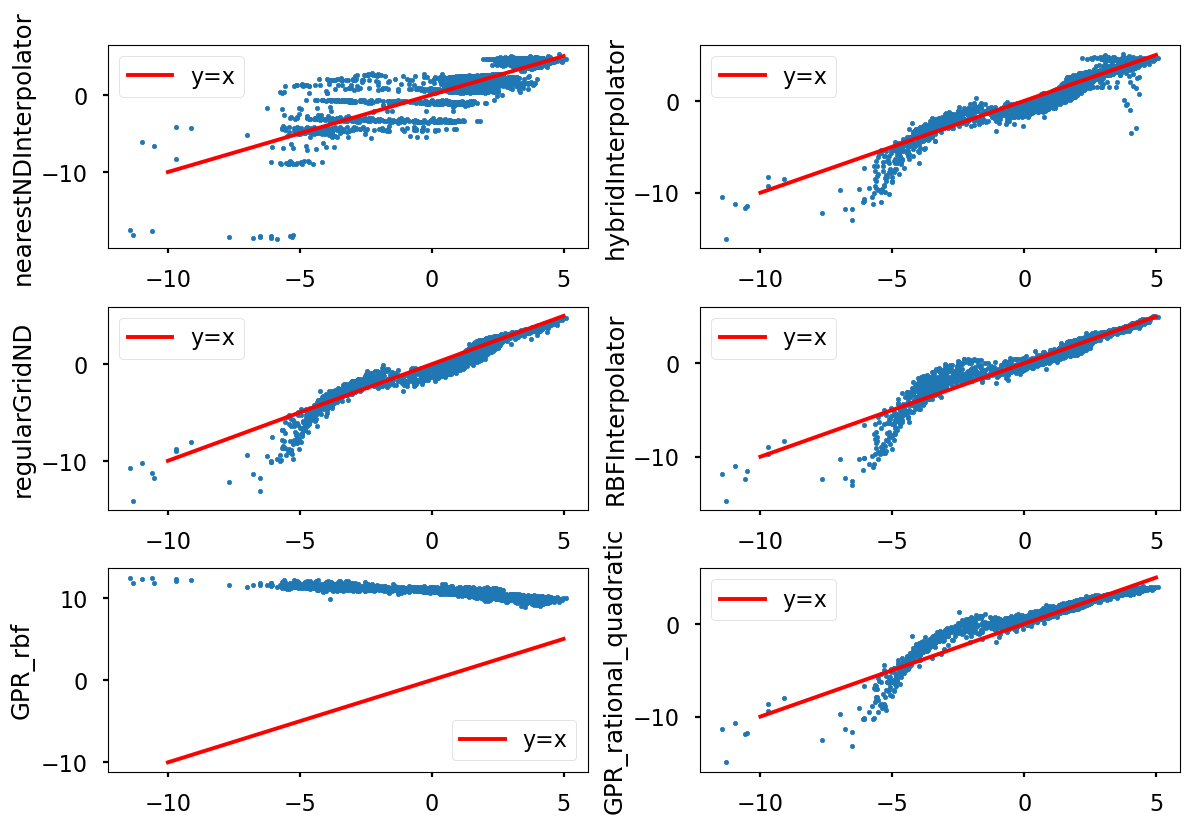

In [55]:

# Define x and y
x = np.linspace(start=-10, stop=5, num=10)
y = x

# Create a 2x2 subplot figure
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8), dpi=100)

s = 10
column_name = "L_co_10"
# First subplot: nearestNDInterpolator
ax = axes[0, 0]
ax.plot(x, y, c="red", label="y=x")
ax.scatter(
    np.log10(runs['expected']['data'][column_name]),
    np.log10(runs['nearestNDInterpolator']['data'][column_name]),
    s = s,
)
ax.set_ylabel("nearestNDInterpolator")
ax.legend()

# Second subplot: hybridInterpolator
ax = axes[0, 1]
ax.plot(x, y, c="red", label="y=x")
ax.scatter(
    np.log10(runs['expected']['data'][column_name]),
    np.log10(runs['hybridInterpolator']['data'][column_name]),
    s = s,    
)
ax.set_ylabel("hybridInterpolator")
ax.legend()

# Third subplot: regularGridND
ax = axes[1, 0]
ax.plot(x, y, c="red", label="y=x")
ax.scatter(
    np.log10(runs['expected']['data'][column_name]),
    np.log10(runs['regularGridND']['data'][column_name]),
    s = s,
)
ax.set_ylabel("regularGridND")
ax.legend()

# Fourth subplot: RBFInterpolator
ax = axes[1, 1]
ax.plot(x, y, c="red", label="y=x")
ax.scatter(
    np.log10(runs['expected']['data'][column_name]),
    np.log10(runs['RBFInterpolator']['data'][column_name]),
    s = s,    
)
ax.set_ylabel("RBFInterpolator")
ax.legend()

# Fifth subplot: GaussianProcessRegressor_rbf
ax = axes[2, 0]
ax.plot(x, y, c="red", label="y=x")
ax.scatter(
    np.log10(runs['expected']['data'][column_name]),
    np.log10(runs['GaussianProcessRegressor_rbf']['data'][column_name]),
    s = s,
)
ax.set_ylabel("GPR_rbf")
ax.legend()

# Sixth subplot: GaussianProcessRegressor_rational_quadratic
ax = axes[2, 1]
ax.plot(x, y, c="red", label="y=x")
ax.scatter(
    np.log10(runs['expected']['data'][column_name]),
    np.log10(runs['GaussianProcessRegressor_rational_quadratic']['data'][column_name]),
    s = s,
)
ax.set_ylabel("GPR_rational_quadratic")
ax.legend()

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


